In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# py imports
import wrangle_zillow

In [28]:
df = wrangle_zillow.wrangle()

--- Shape: (52441, 63)
--- Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52441 entries, 0 to 52440
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         52441 non-null  float64
 1   parcelid                      52441 non-null  int64  
 2   id                            52441 non-null  int64  
 3   logerror                      52441 non-null  float64
 4   transactiondate               52441 non-null  object 
 5   id.1                          52441 non-null  int64  
 6   airconditioningtypeid         13638 non-null  float64
 7   architecturalstyletypeid      70 non-null     float64
 8   basementsqft                  47 non-null     float64
 9   bathroomcnt                   52441 non-null  float64
 10  bedroomcnt                    52441 non-null  float64
 11  buildingclasstypeid           0 non-null      float64
 12  buildingqualitytypeid       

In [29]:
df.fips.value_counts()

6037.0    33899
6059.0    14094
6111.0     4383
Name: fips, dtype: int64

In [30]:
df.drop(columns = ['buildingqualitytypeid','heatingorsystemtypeid','propertyzoningdesc','unitcnt'], inplace=True)

In [31]:
df.head()

,propertylandusetypeid,parcelid,id,logerror,transactiondate,id.1,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,...,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc
0,261.0,14297519,0,0.025595,2017-01-01,1727539,3.5,4.0,3.5,3100.0,...,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,Single Family Residential
1,261.0,17052889,1,0.055619,2017-01-01,1387261,1.0,2.0,1.0,1465.0,...,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,Single Family Residential
2,261.0,14186244,2,0.005383,2017-01-01,11677,2.0,3.0,2.0,1243.0,...,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,Single Family Residential
3,261.0,12177905,3,-0.103410,2017-01-01,2288172,3.0,4.0,3.0,2376.0,...,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,Single Family Residential
4,261.0,12095076,6,-0.001011,2017-01-01,781532,3.0,4.0,3.0,2962.0,...,96293.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,Single Family Residential


In [32]:
df.isnull().sum()

propertylandusetypeid              0
parcelid                           0
id                                 0
logerror                           0
transactiondate                    0
id.1                               0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                 72
calculatedfinishedsquarefeet      17
finishedsquarefeet12             182
fips                               0
fullbathcnt                       72
latitude                           0
longitude                          0
lotsizesquarefeet                360
propertycountylandusecode          0
rawcensustractandblock             0
regionidcity                    1031
regionidcounty                     0
regionidzip                       23
roomcnt                            0
yearbuilt                         51
structuretaxvaluedollarcnt        76
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
t

In [33]:
df.groupby('fips').yearbuilt.agg(['min','mean','max'])

,min,mean,max
fips,,,
6037.0,1878.0,1957.201446,2016.0
6059.0,1893.0,1974.330754,2015.0
6111.0,1880.0,1976.181922,2016.0


In [34]:
los_angeles= df[df.fips == 6037]

In [35]:
los_angeles.shape

(33899, 30)

In [36]:
orange = df[df.fips == 6059]
orange.shape

(14094, 30)

In [37]:
ventura = df[df.fips == 6111]
ventura.shape

(4383, 30)

In [38]:
los_angeles = wrangle_zillow.remove_outliers(los_angeles, 1.5, ['calculatedbathnbr','calculatedfinishedsquarefeet','finishedsquarefeet12','fullbathcnt','lotsizesquarefeet',\
                                              'regionidcity','regionidzip','yearbuilt','structuretaxvaluedollarcnt','censustractandblock'])

In [39]:
los_angeles.shape

(19925, 30)

In [40]:
orange = wrangle_zillow.remove_outliers(orange, 1.5, ['calculatedbathnbr','calculatedfinishedsquarefeet','finishedsquarefeet12','fullbathcnt','lotsizesquarefeet',\
                                              'regionidcity','regionidzip','yearbuilt','structuretaxvaluedollarcnt','censustractandblock'])

In [41]:
orange.shape

(10024, 30)

In [42]:
ventura = wrangle_zillow.remove_outliers(ventura, 1.5, ['calculatedbathnbr','calculatedfinishedsquarefeet','finishedsquarefeet12','fullbathcnt','lotsizesquarefeet',\
                                              'regionidcity','regionidzip','yearbuilt','structuretaxvaluedollarcnt','censustractandblock'])

In [43]:
ventura.shape

(2239, 30)

In [44]:
df = pd.concat([los_angeles, orange, ventura], axis=0, join='outer')

In [45]:
df.head()

,propertylandusetypeid,parcelid,id,logerror,transactiondate,id.1,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,...,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc
5,261.0,12069064,7,0.101723,2017-01-01,870991,1.0,2.0,1.0,738.0,...,96325.0,0.0,1922.0,18890.0,218552.0,2016.0,199662.0,2366.08,6.037302e+13,Single Family Residential
11,261.0,11830315,18,-0.035085,2017-01-02,571930,1.0,2.0,1.0,1146.0,...,96003.0,0.0,1939.0,127960.0,273745.0,2016.0,145785.0,3739.02,6.037532e+13,Single Family Residential
15,261.0,12531488,25,0.042041,2017-01-02,1723297,1.0,3.0,1.0,1641.0,...,96237.0,0.0,1944.0,98038.0,432754.0,2016.0,334716.0,5212.75,6.037578e+13,Single Family Residential
17,261.0,11130689,27,0.020110,2017-01-02,1718341,2.0,3.0,2.0,1538.0,...,96352.0,0.0,1972.0,222238.0,401399.0,2016.0,179161.0,5438.41,6.037920e+13,Single Family Residential
18,261.0,12036177,28,0.206470,2017-01-02,707014,2.0,3.0,2.0,1851.0,...,96008.0,0.0,1920.0,32264.0,85035.0,2016.0,52771.0,1232.08,6.037189e+13,Single Family Residential


In [46]:
df.fips.value_counts()

6037.0    19925
6059.0    10024
6111.0     2239
Name: fips, dtype: int64

In [47]:
df.columns

Index(['propertylandusetypeid', 'parcelid', 'id', 'logerror',
       'transactiondate', 'id.1', 'bathroomcnt', 'bedroomcnt',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock', 'propertylandusedesc'],
      dtype='object')

In [50]:
df.fips = df.fips.replace({6037:'la', 6059: 'orange', 6111: 'ventura'})

In [51]:
df.fips

5             la
11            la
15            la
17            la
18            la
          ...   
51866    ventura
51885    ventura
51886    ventura
51891    ventura
52438    ventura
Name: fips, Length: 32188, dtype: object

In [52]:
train, validate, test = wrangle_zillow.split_continuous(df)

train -> (18025, 30)
validate -> (7725, 30)
test -> (6438, 30)


In [53]:
train.fips

42454        la
23911    orange
12118        la
6480     orange
27104        la
          ...  
2565     orange
30531    orange
41170        la
14551        la
4523     orange
Name: fips, Length: 18025, dtype: object

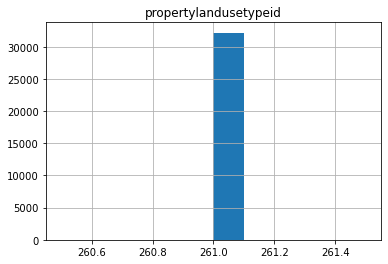

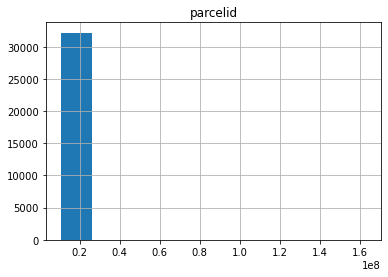

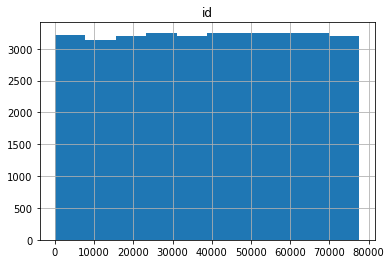

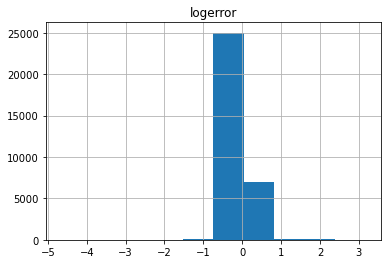

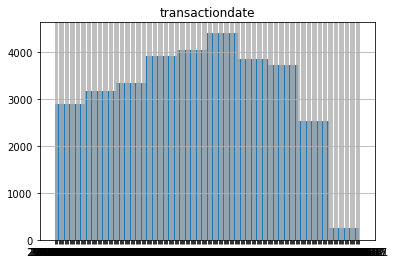

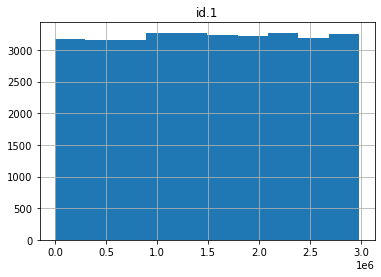

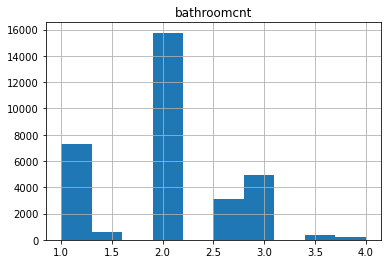

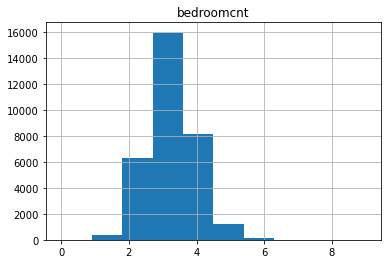

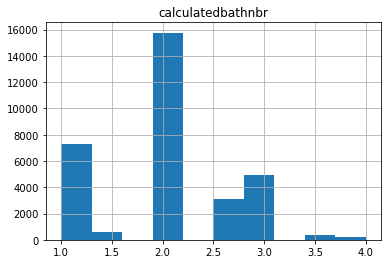

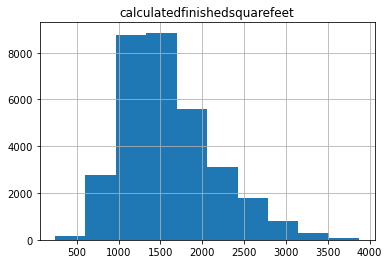

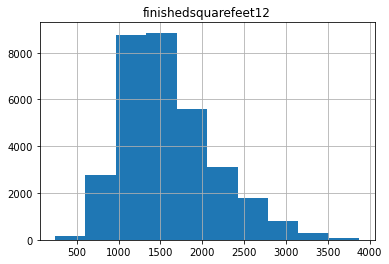

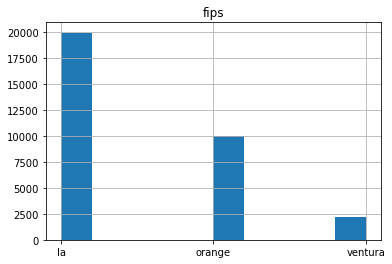

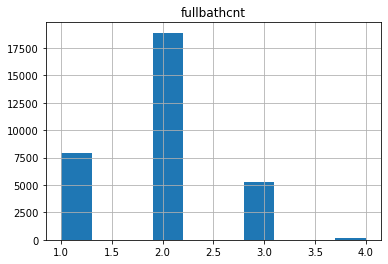

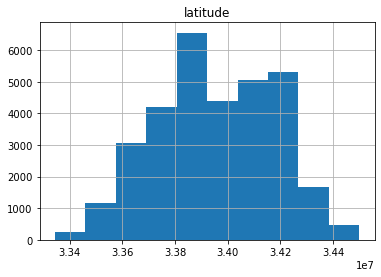

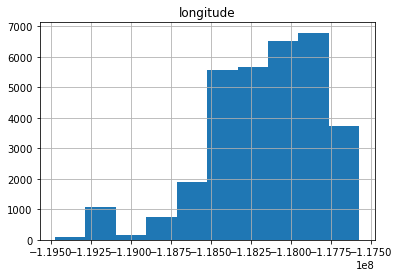

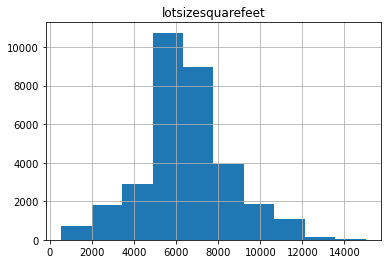

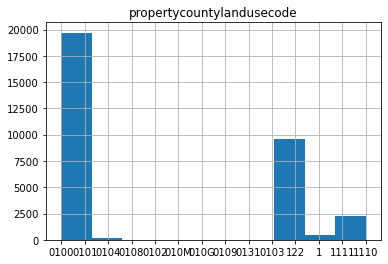

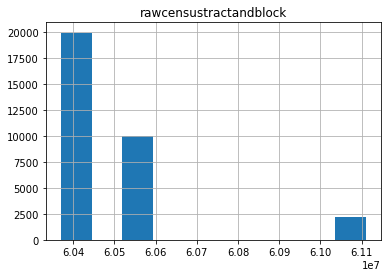

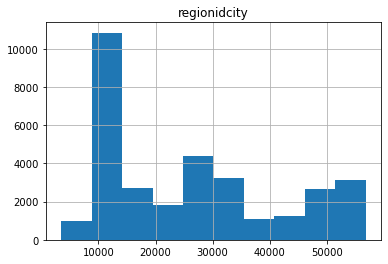

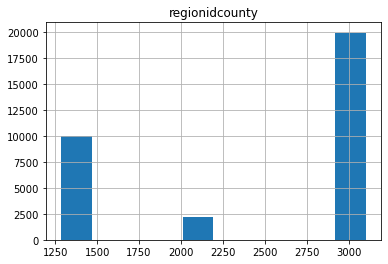

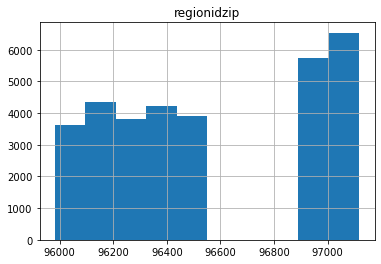

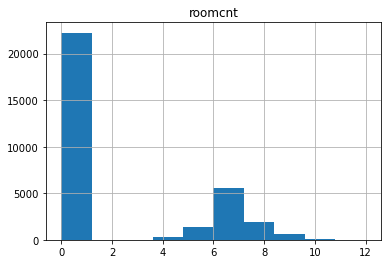

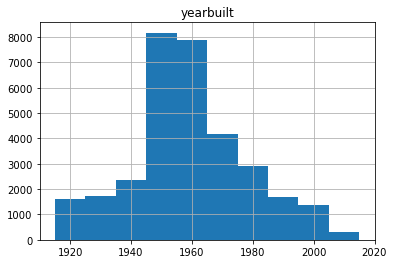

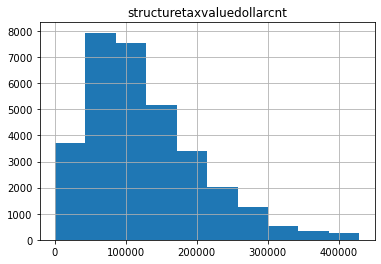

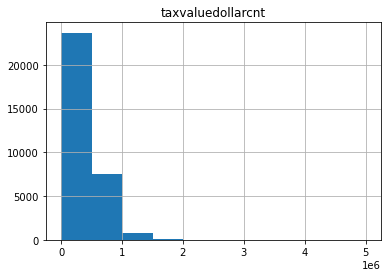

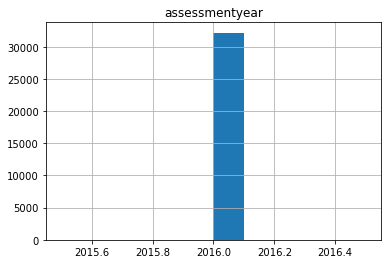

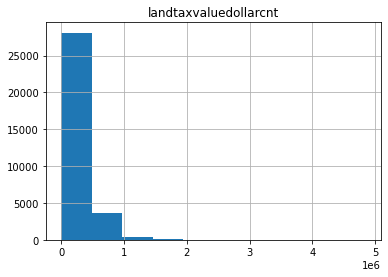

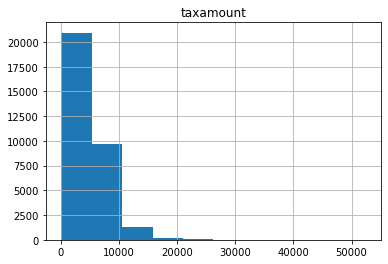

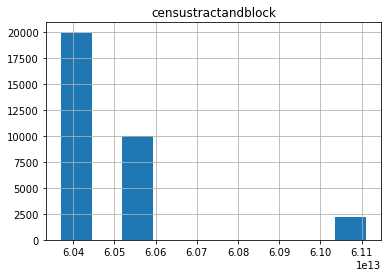

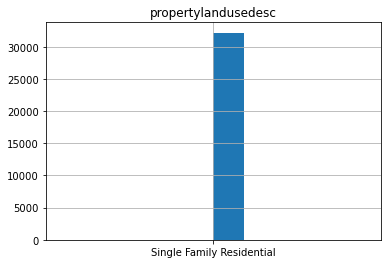

In [54]:
for col in df.columns:
    df[col].hist()
    plt.title(col)
    plt.show()

## Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

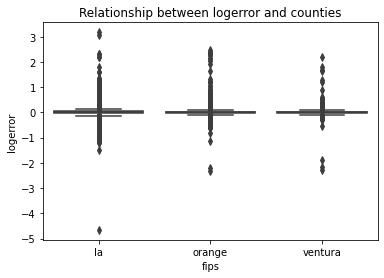

In [55]:
sns.boxplot(data=train, x='fips', y='logerror')
plt.title('Relationship between logerror and counties')
plt.show()

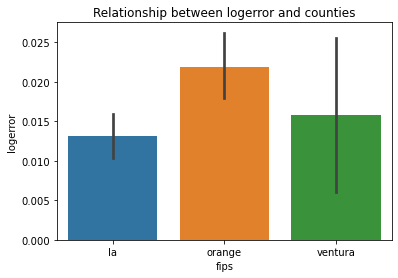

In [56]:
sns.barplot(data=train, x='fips', y='logerror')
plt.title('Relationship between logerror and counties')
plt.show()

H0: logerror means of the three counties, Los Angeles, Orange & Ventura, are all equal.

Ha: logerror means of the three counties, Los Angeles, Orange & Ventura, are NOT equal.

alpha = 0.05

In [57]:
f,p = stats.f_oneway(train.logerror[train.fips == 'la'], train.logerror[train.fips == 'orange'], train.logerror[train.fips == 'ventura'])
f,p
                     

(5.733621747850393, 0.0032412429565147546)

We were able to reject the null hypothesis

## Is there a relationship between Lotsizesquarefeet and logerror?

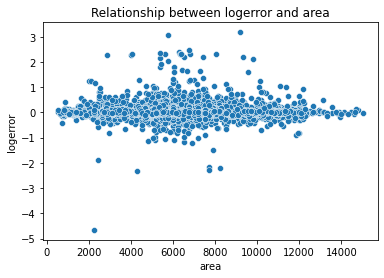

In [60]:
sns.scatterplot(data=train, x='lotsizesquarefeet', y='logerror')
plt.title('Relationship between logerror and area')
plt.xlabel('area')
plt.show()

H0: There is no linear correlation between the logerror and lotsizesquarefeet.

Ha: There is a linear correlation between the logerror and lotsizesquarefeet.

alpha = 0.05

In [61]:
r, p = stats.pearsonr(train.lotsizesquarefeet, train.logerror)
r, p

(-0.004768236802657255, 0.5220884507535047)

We failed to reject the null hypothesis

## Is there a relationship between yearbuilt and logerror?

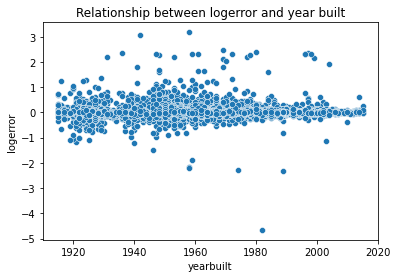

In [62]:
sns.scatterplot(data=train, x='yearbuilt', y='logerror')
plt.title('Relationship between logerror and year built')
plt.show()

In [63]:
train.yearbuilt.value_counts()

1955.0    806
1950.0    732
1953.0    684
1954.0    655
1956.0    573
         ... 
2011.0     11
2015.0      8
2010.0      7
2008.0      6
2009.0      6
Name: yearbuilt, Length: 101, dtype: int64

H0: There is no linear correlation between the logerror and yearbuilt.

Ha: There is a linear correlation between the logerror and yearbuilt.

alpha = 0.05

In [66]:
r, p = stats.pearsonr(train.yearbuilt, train.logerror)
r, p

(0.019048599304799414, 0.010543769195033505)

We were able to reject the null hypothesis!

## Is there a relationship between bedrooms and logerror?

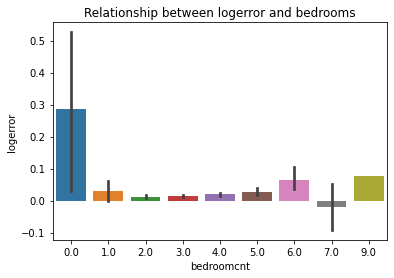

In [71]:
sns.barplot(data=train, x=train.bedroomcnt, y=train.logerror)
plt.title('Relationship between logerror and bedrooms')
plt.show()

In [69]:
train.bedroomcnt.value_counts()

3.0    8897
4.0    4605
2.0    3552
5.0     678
1.0     216
6.0      65
7.0       8
0.0       3
9.0       1
Name: bedroomcnt, dtype: int64

In [72]:
train.bedroomcnt.median()

3.0

In [83]:
train['bed_bin'] = pd.cut(train.bedroomcnt, [0,3,9], labels=['3_and_under','over_3'])
train.head()

,propertylandusetypeid,parcelid,id,logerror,transactiondate,id.1,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,bed_bin,bath_bin
42454,261.0,12921253,62775,0.009074,2017-07-31,322622,3.0,3.0,3.0,1755.0,...,1958.0,135230.0,447300.0,2016.0,312070.0,5349.64,6.037404e+13,Single Family Residential,3_and_under,over_2
23911,261.0,14370394,35549,-0.010220,2017-05-12,131578,2.5,3.0,2.5,1389.0,...,1986.0,145498.0,538144.0,2016.0,392646.0,5601.46,6.059052e+13,Single Family Residential,3_and_under,over_2
12118,261.0,10856776,18032,-0.013670,2017-03-17,568624,2.0,2.0,2.0,1518.0,...,1941.0,72700.0,363524.0,2016.0,290824.0,4394.03,6.037141e+13,Single Family Residential,3_and_under,2_and_under
6480,261.0,14130828,9662,-0.004964,2017-02-14,369533,2.0,2.0,2.0,1621.0,...,1977.0,66557.0,91804.0,2016.0,25247.0,1293.60,6.059087e+13,Single Family Residential,3_and_under,2_and_under
27104,261.0,12197798,40213,0.013592,2017-05-26,543576,2.0,2.0,2.0,883.0,...,1923.0,10121.0,21071.0,2016.0,10950.0,319.99,6.037240e+13,Single Family Residential,3_and_under,2_and_under


In [74]:
train.bed_bin.value_counts()

3_and_under    12665
over_3          5357
Name: bed_bin, dtype: int64

H0: There is no significant difference between logerror and bedrooms.

Ha: There is a signficant difference between the logerror and bedrooms.

alpha = 0.05

In [75]:
stats.levene(train.logerror[train.bed_bin == '3_and_under'],
             train.logerror[train.bed_bin == 'over_3'])

LeveneResult(statistic=13.720276917936987, pvalue=0.0002127852200176397)

In [77]:
t, p = stats.ttest_ind(train.logerror[train.bed_bin == '3_and_under'],
             train.logerror[train.bed_bin == 'over_3'],
               equal_var=False)
t, p

(-3.190257758249912, 0.0014262270385992572)

We were able to reject the null hypothesis!

## Is there a relationship between bathrooms and logerror?

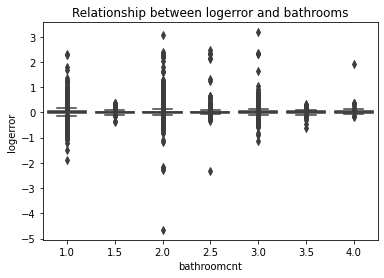

In [78]:
sns.boxplot(data=train, x=train.bathroomcnt, y=train.logerror)
plt.title('Relationship between logerror and bathrooms')
plt.show()

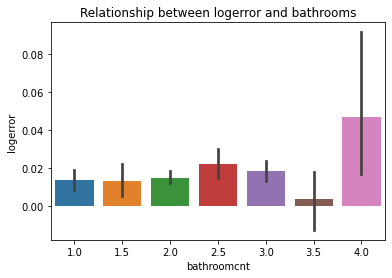

In [79]:
sns.barplot(data=train, x=train.bathroomcnt, y=train.logerror)
plt.title('Relationship between logerror and bathrooms')
plt.show()

In [80]:
train.bathroomcnt.median()

2.0

In [84]:
train['bath_bin'] = pd.cut(train.bathroomcnt, [0,2,4], labels=['2_and_under','over_2'])
train.head()

,propertylandusetypeid,parcelid,id,logerror,transactiondate,id.1,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,bed_bin,bath_bin
42454,261.0,12921253,62775,0.009074,2017-07-31,322622,3.0,3.0,3.0,1755.0,...,1958.0,135230.0,447300.0,2016.0,312070.0,5349.64,6.037404e+13,Single Family Residential,3_and_under,over_2
23911,261.0,14370394,35549,-0.010220,2017-05-12,131578,2.5,3.0,2.5,1389.0,...,1986.0,145498.0,538144.0,2016.0,392646.0,5601.46,6.059052e+13,Single Family Residential,3_and_under,over_2
12118,261.0,10856776,18032,-0.013670,2017-03-17,568624,2.0,2.0,2.0,1518.0,...,1941.0,72700.0,363524.0,2016.0,290824.0,4394.03,6.037141e+13,Single Family Residential,3_and_under,2_and_under
6480,261.0,14130828,9662,-0.004964,2017-02-14,369533,2.0,2.0,2.0,1621.0,...,1977.0,66557.0,91804.0,2016.0,25247.0,1293.60,6.059087e+13,Single Family Residential,3_and_under,2_and_under
27104,261.0,12197798,40213,0.013592,2017-05-26,543576,2.0,2.0,2.0,883.0,...,1923.0,10121.0,21071.0,2016.0,10950.0,319.99,6.037240e+13,Single Family Residential,3_and_under,2_and_under


H0: There is no significant difference between logerror and bathrooms.

Ha: There is a signficant difference between the logerror and bathrooms.

alpha = 0.05

In [85]:
stats.levene(train.logerror[train.bath_bin == '2_and_under'],
             train.logerror[train.bath_bin == 'over_2'])

LeveneResult(statistic=39.67721415548131, pvalue=3.065385592696958e-10)

In [86]:
t, p = stats.ttest_ind(train.logerror[train.bath_bin == '2_and_under'],
             train.logerror[train.bath_bin == 'over_2'],
               equal_var=False)
t, p

(-2.0305587476177096, 0.04232949604022008)

We were able to reject the null hypothesis